# Prerequisite

It is assumed that learners will have completed the core Software Carpentry lessons on the Unix Shell, Python and Git before tackling this lesson.

The following additional Python libraries must also be installed to complete the lesson:

'pip install gitpython'

In [2]:
!pip install gitpython

  Running setup.py bdist_wheel for gitpython: started
  Running setup.py bdist_wheel for gitpython: finished with status 'done'
  Stored in directory: C:\Users\htra8681\AppData\Local\pip\Cache\wheels\8c\94\af\02f0fe440021fc93c9d325994fae649ab46e5839340be14d7c
  Running setup.py bdist_wheel for gitdb: started
  Running setup.py bdist_wheel for gitdb: finished with status 'done'
  Stored in directory: C:\Users\htra8681\AppData\Local\pip\Cache\wheels\24\af\3c\0dc34fe9f16a057738fe88aee0c794a57755f238c0eaaf70f1
  Running setup.py bdist_wheel for smmap: started
  Running setup.py bdist_wheel for smmap: finished with status 'done'
  Stored in directory: C:\Users\htra8681\AppData\Local\pip\Cache\wheels\f2\8d\a5\d50981a5b89062285700f9aaed87d9ca02f287226f7c0979b2
Successfully built gitpython gitdb smmap


You are using pip version 8.1.1, however version 8.1.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
!python -m pip install --upgrade pip

  Found existing installation: pip 8.1.1
    Uninstalling pip-8.1.1:
      Successfully uninstalled pip-8.1.1


# Topic1:Data Management

In this lesson we are going to process some data collected by Australia's Integrated Marine Observing System (IMOS).

First off, let's load our data:

In [6]:
from netCDF4 import Dataset

In [8]:
acorn_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/ACORN/monthly_gridded_1h-avg-current-map_non-QC/TURQ/2012/IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc.gz'
#arcorn_URL = 'http://thredds.aodn.org.au/thredds/dodsC/IMOS/eMII/demos/ACORN/monthly_gridded_1h-avg-current-map_non-QC/TURQ/2012/IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc.gz'
acorn_DATA = Dataset(acorn_URL) 

In [9]:
print(acorn_DATA)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    project: Integrated Marine Observing System (IMOS)
    Conventions: IMOS version 1.3
    institution: Australian Coastal Ocean Radar Network (ACORN)
    title: IMOS ACORN Turquoise Coast site (WA) (TURQ), monthly aggregation of one hour averaged current data
    instrument: CODAR Ocean Sensors/SeaSonde
    site_code: TURQ, Turqoise Coast
    ssr_Stations: SeaBird (SBRD), Cervantes (CRVT)
    id: IMOS/ACORN/au/TURQ/2012-10-08T15:00:00Z.sea_state
    date_created: 2012-10-30T16:31:50Z
    abstract: These data have not been quality controlled. The ACORN facility is producing NetCDF files with radials data for each station every ten minutes.  Radials represent the surface sea water state component  along the radial direction from the receiver antenna  and are calculated from the shift of an area under  the bragg peaks in a Beam Power Spectrum.  The radial values have been calculated using soft

In [10]:
type(acorn_DATA)

netCDF4._netCDF4.Dataset

The first thing to notice is the distinctive Data Reference Syntax (DRS) associated with the file. The staff at IMOS have archived the data according to the following directory structure:

In [ ]:
# http://thredds.aodn.org.au/thredds/dodsC/<project>/<organisation>/<collection>/<facility>/<data-type>/<site-code>/<year>/

http://thredds.aodn.org.au/thredds/dodsC/<project>/<organisation>/<collection>/<facility>/<data-type>/<site-code>/<year>/

http://thredds.aodn.org.au/thredds/dodsC/

From this we can deduce, without even inspecting the contents of the file, that we have data from the IMOS project that is run by the eMarine Information Infrastructure (eMII). It was collected in 2012 at the Turquoise Coast, Western Australia (TURQ) site of the Australian Coastal Ocean Radar Network (ACORN), which is a network of high frequency radars that measure the ocean surface current (see this page on the Research Data Australia website for a nice overview of the dataset).

The data type has a sub-DRS of its own, which tells us that the data represents the 1-hourly average surface current for a single month (October 2012), and that it is archived on a regularly spaced spatial grid and has not been quality controlled. The file is located in the "demos" directory, as it has been generated for the purpose of providing an example for users in the very helpful Australian Ocean Data Network (AODN) user code library.

Just in case the file gets separated from this informative directory stucture, much of the information is repeated in the file name itself, along with some more detailed information about the start and end time of the data, and the last time the file was modified.

In [15]:
# <project>_<facility>_V_<time-start>_<site-code>_FV00_<data-type>_<time-end>_<modified>.nc.gz

In the first instance this level of detail seems like a bit of overkill, but consider the scope of the IMOS data archive. It is the final resting place for data collected by the entire national array of oceanographic observing equipment in Australia, which monitors the open oceans and coastal marine environment covering physical, chemical and biological variables. Since the data are so well labelled, locating all monthly timescale ACORN data from the Turquoise Coast and Rottnest Shelf sites (which represents hundreds of files) would be as simple as typing the following at the command line:

In [18]:
$ ls */ACORN/monthly_*/{TURQ,ROT}/*/*.nc

SyntaxError: invalid syntax (<ipython-input-18-62062537c4fb>, line 1)

While it's unlikely that your research will ever involve cataloging data from such a large observational network, it's still a very good idea to develop your own personal DRS for the data you do have. This often involves investing some time at the beginning of a project to think carefully about the design of your directory and file name structures, as these can be very hard to change later on (a good example is the DRS used by the Climate Model Intercomparison Project). The combination of bash shell wildcards and a well planned DRS is one of the easiest ways to make your research more efficient and reliable.

We haven't even looked inside our IMOS data file and already we have the beginnings of a detailed data management plan. The first step in any research project should be to develop such a plan, so for this challenge we are going to turn back time. If you could start your current research project all over again, what would your data management plan look like? Things to consider include:

    Data Reference Syntax

    How long it will take to obtain the data

    Storage and backup (here's a post with some backup ideas)

Write down and discuss your plan with your partner.

# Topic 2: Data processing

Learning Objective:
    Access the metadata within netCDF files;
    
    Process and plot the contents of a netCDF file;
    
    Use vectorisation instead of looping to speed up data processing;
    
    Awareness of the python libraries used to make plotting and metadata handling easier

In [19]:
print(acorn_DATA)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    project: Integrated Marine Observing System (IMOS)
    Conventions: IMOS version 1.3
    institution: Australian Coastal Ocean Radar Network (ACORN)
    title: IMOS ACORN Turquoise Coast site (WA) (TURQ), monthly aggregation of one hour averaged current data
    instrument: CODAR Ocean Sensors/SeaSonde
    site_code: TURQ, Turqoise Coast
    ssr_Stations: SeaBird (SBRD), Cervantes (CRVT)
    id: IMOS/ACORN/au/TURQ/2012-10-08T15:00:00Z.sea_state
    date_created: 2012-10-30T16:31:50Z
    abstract: These data have not been quality controlled. The ACORN facility is producing NetCDF files with radials data for each station every ten minutes.  Radials represent the surface sea water state component  along the radial direction from the receiver antenna  and are calculated from the shift of an area under  the bragg peaks in a Beam Power Spectrum.  The radial values have been calculated using soft

The great thing about netCDF files is that they contain metadata - that is, data about the data. There are global attributes that give information about the file as a whole (shown above - we will come back to these later), while each variable also has its own attributes.

To see how many variables in the data:

In [22]:
print ('The file contains the following variables:')
print (acorn_DATA.variables.keys())

The file contains the following variables:
odict_keys(['LATITUDE', 'LONGITUDE', 'LATITUDE_quality_control', 'LONGITUDE_quality_control', 'TIME', 'SPEED', 'UCUR', 'VCUR', 'TIME_quality_control', 'SPEED_quality_control', 'UCUR_quality_control', 'VCUR_quality_control'])


(The 'u' means each variable name is represented by a Unicode string.)

To understand more about each variable:

In [27]:
acorn_DATA.variables['TIME']

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    standard_name: time
    long_name: time
    units: days since 1950-01-01 00:00:00
    axis: T
    valid_min: 0.0
    valid_max: 999999.0
    _FillValue: -9999.0
    calendar: gregorian
    comment: Given time lays at the middle of the averaging time period.
    local_time_zone: 8.0
unlimited dimensions: 
current shape = (493,)
filling off

You can extract all or apart of each variable in the dataset

In [99]:
acorn_DATA.variables['TIME'][0:10]

array([ 22919.        ,  22919.04166667,  22919.08333333,  22919.125     ,
        22919.16666667,  22919.20833333,  22919.25      ,  22919.29166667,
        22919.33333333,  22919.375     ])

The raw time values are fairly meaningless, but we can use the time attributes to convert them to a more meaningful format...

In [38]:
from netCDF4 import num2date

In [41]:
units = acorn_DATA.variables['TIME'].units
calendar = acorn_DATA.variables['TIME'].calendar

times = num2date(acorn_DATA.variables['TIME'][:], units=units, calendar=calendar)
print(times[0:10])

[datetime.datetime(2012, 10, 1, 0, 0) datetime.datetime(2012, 10, 1, 1, 0)
 datetime.datetime(2012, 10, 1, 2, 0) datetime.datetime(2012, 10, 1, 3, 0)
 datetime.datetime(2012, 10, 1, 4, 0) datetime.datetime(2012, 10, 1, 5, 0)
 datetime.datetime(2012, 10, 1, 6, 0) datetime.datetime(2012, 10, 1, 7, 0)
 datetime.datetime(2012, 10, 1, 8, 0) datetime.datetime(2012, 10, 1, 9, 0)]


# Calculating the current speed

For the sake of example, let's say that our data file contained the zonal (east/west; 'UCUR') and meridional (north/south; 'VCUR') surface current components, but not the total current speed. To calculate it, we first need to assign a variable to the zonal and meridional current data.

In [42]:
uData = acorn_DATA.variables['UCUR'][:,:,:]
vData = acorn_DATA.variables['VCUR'][:,:,:]

Both uData and vData are a special type of numpy array (which we have met previously) known as a masked array, whereby some of the points in the time/latitude/longitude grid have missing (or masked) values. Just as with a normal numpy array, we can check the shape of our data (in fact, masked arrays can do everything normal numpy arrays can do and more).

In [43]:
print (type(uData))
print (uData.shape)

<class 'numpy.ma.core.MaskedArray'>
(493, 55, 57)


In other words, 493 time steps, 55 latitudes and 57 longitudes. We can now go ahead and calculate the current speed.

In [44]:
spData = (uData**2 + vData**2)**0.5

# Viewing the result

In [45]:
%matplotlib inline
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig

In [46]:
LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']

In [50]:
# Only one time value is being plotted. modify timeIndex if desired (value between 0 and 'len(TIME)-1' )
timeIndex = 492
speedData = spData[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

In [51]:
# sea water U and V components
uData = acorn_DATA.variables['UCUR'][timeIndex,:,:]
vData = acorn_DATA.variables['VCUR'][timeIndex,:,:]
units = acorn_DATA.variables['UCUR'].units

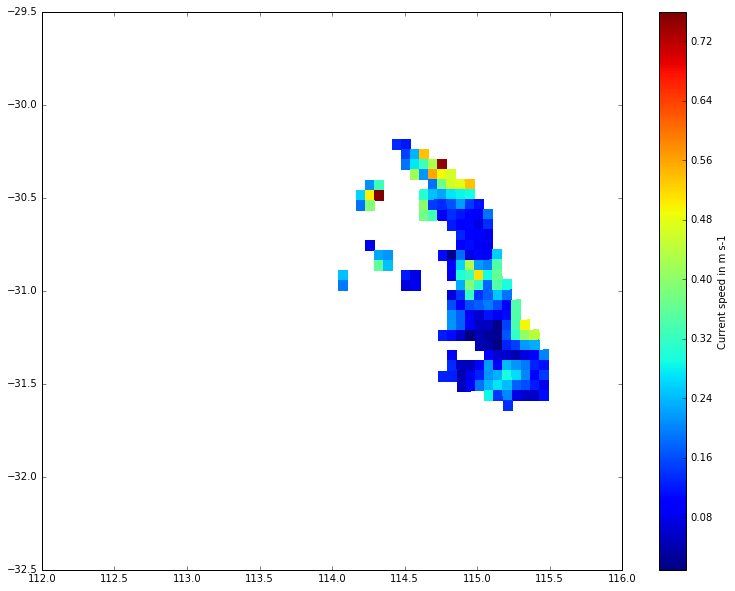

In [53]:
figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, speedData)
cbar = colorbar()
cbar.ax.set_ylabel('Current speed in ' + units)

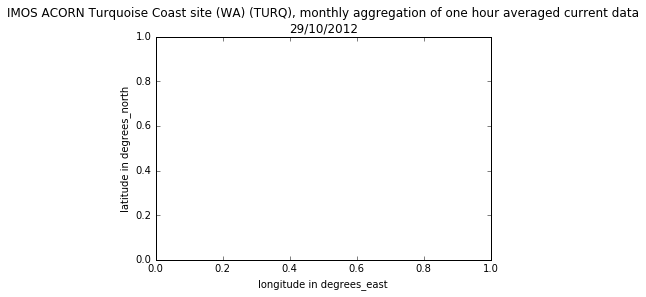

In [56]:
title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

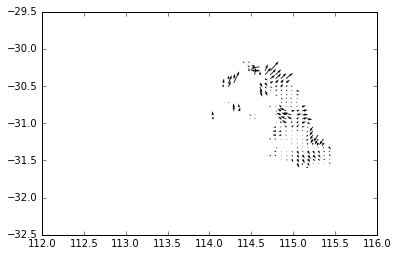

In [60]:
# plot velocity field
Q = quiver(lonData[:], latData[:], uData, vData, units='width')
#show()

Nếu gộp tất cả các lệnh trên lại thì ta có đoạn code tổng thể để thể hiện kết quả như sau:

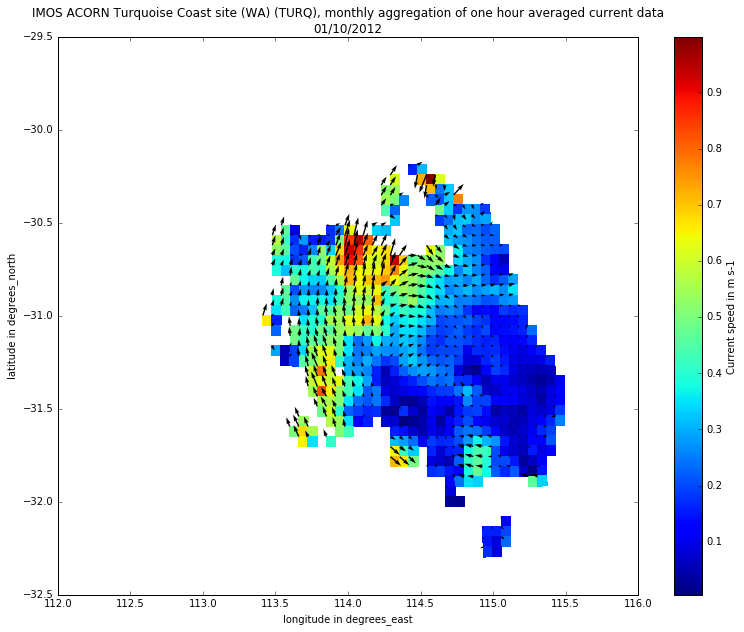

In [61]:
%matplotlib inline
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig

LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']

# Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
timeIndex = 4
speedData = spData[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

# sea water U and V components
uData = acorn_DATA.variables['UCUR'][timeIndex,:,:]
vData = acorn_DATA.variables['VCUR'][timeIndex,:,:]
units = acorn_DATA.variables['UCUR'].units

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, speedData)
cbar = colorbar()
cbar.ax.set_ylabel('Current speed in ' + units)

title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

# plot velocity field
Q = quiver(lonData[:], latData[:], uData, vData, units='width')
show()

# Plotting options

Quite a few lines of code were required to create our publication quality figure using matplotlib, and there would have been even more had we wanted to use the basemap library to plot coastlines or change the map projection. Recognising this burden, the team at the UK Met Office have developed Iris and Cartopy, which build on matplotlib and basemap to provide a more convenient interface (read: shorter, less complex code) for plotting in the weather, climate and ocean sciences.

The easiest way to install Iris and Cartopy is to use the conda package installer that comes with Anaconda. Simply enter the following at the command line:(Note that: iris is conflict with Python3, okay with python2)

In [62]:
# conda install -c scitools iris

What if you want to view the contents of a netCDF file quickly, rather than go to the effort of producing something that is publication quality? There are numerous tools out there for doing this, including Panoply and UV-CDAT.

# Vectorisation

Let's say (hypothetically) that the TURQ site radar has been found to be unreliable for surface current speeds greater than 0.9 m/s. To correct for this problem, the IMOS documentation suggests setting all values greater than 0.9 m/s, back to 0.9 m/s. The most obvious solution to this problem would be to loop through every element in spData and check its value:

In [69]:
for t in range(0, len(TIME[:])):
    for y in range(0, len(LAT[:])):
        for x in range(0, len(LON[:])):
            if spData[t, y, x] > 0.9:
                spData[t, y, x] = 0.9

spData_modf=spData

Then let see how the drawing change after modifying the spData:

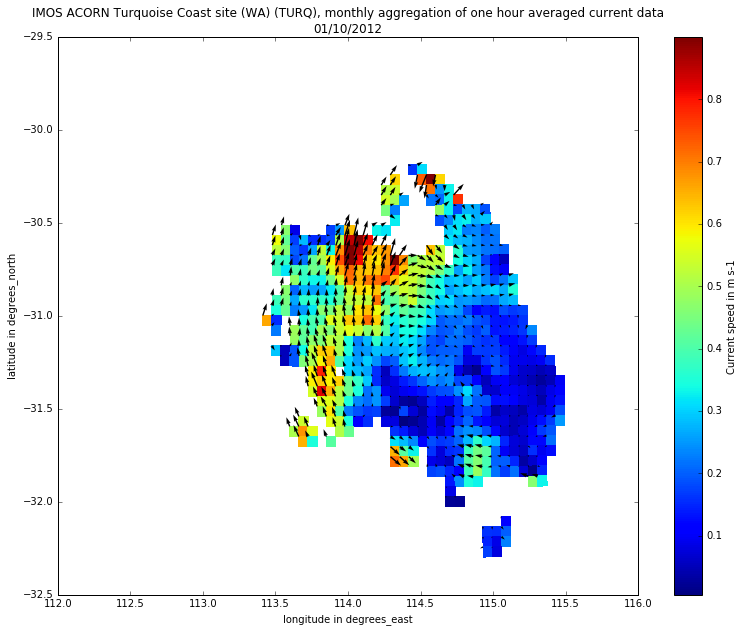

In [70]:
%matplotlib inline
from matplotlib.pyplot import figure, pcolor, colorbar, xlabel, ylabel, title, draw, quiver, show, savefig

LAT = acorn_DATA.variables['LATITUDE']
LON = acorn_DATA.variables['LONGITUDE']
TIME = acorn_DATA.variables['TIME']

# Only one time value is being plotted. modify timeIndex if desired (value between 0 and length(timeData)-1 )
timeIndex = 4
speedData_modf = spData[timeIndex,:,:]
latData = LAT[:]
lonData = LON[:]

# sea water U and V components
uData = acorn_DATA.variables['UCUR'][timeIndex,:,:]
vData = acorn_DATA.variables['VCUR'][timeIndex,:,:]
units = acorn_DATA.variables['UCUR'].units

figure1 = figure(figsize=(13, 10), dpi=80, facecolor='w', edgecolor='k')
pcolor(lonData , latData, speedData_modf)
cbar = colorbar()
cbar.ax.set_ylabel('Current speed in ' + units)

title(acorn_DATA.title + '\n' + num2date(TIME[timeIndex], TIME.units, TIME.calendar).strftime('%d/%m/%Y'))
xlabel(LON.long_name + ' in ' + LON.units)
ylabel(LAT.long_name + ' in ' + LAT.units)

# plot velocity field
Q = quiver(lonData[:], latData[:], uData, vData, units='width')
show()

Let check the difference between spData and spData_modf

In [71]:
diff=spData - spData_modf

In [91]:
0 in diff

True

In [93]:
diff.shape

(493, 55, 57)

The problem is that not only is this nested loop kind of ugly, it's also pretty slow. If our data array was even larger (e.g. like the huge data arrays that high resolution global climate models produce), then it would probably be prohibitively slow. The reason is that high level languages like Python and Matlab are built for usability (i.e. they make it easy to write concise, readable code), not speed. To get around this problem, people have written Python libraries (like numpy) in low level languages like C and Fortran, which are built for speed (but definitely not usability). Fortunately we don't ever need to see the C code under the hood of the numpy library, but we should use it to vectorise our array operations whenever possible.

With this in mind:

    Use the numpy.ma.where() function to correct all values in spData greater than 0.9 (hint: you'll need to import numpy.ma)

    Use the %timeit cell magic to compare the speed of your answer to the nested loop described above

In [94]:
import numpy

In [97]:
numpy.ma.where(spData > 0.9)

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

# Topic3:Data Provenance

Learning Obiects:
    
    Record data processing steps in the history attribute of netCDF files
    
    Include this provenance tracking in a personal data management plan

Now that we've developed some code for reading in zonal and meridional surface current data and calculating the speed, the logical next step is to put that code in a script called calc_current_speed.py so that we can repeat the process quickly and easily.

The output of that script will be a new netCDF file containing the current speed data, however there's one more thing to consider before we go ahead and start creating new files. Looking closely at the global attributes of IMOS_ACORN_V_20121001T000000Z_TURQ_FV00_monthly-1-hour-avg_END-20121029T180000Z_C-20121030T160000Z.nc you can see that the entire history of the file, all the way back to its initial download, has been recorded in the history attribute.

In [100]:
print (acorn_DATA.history)

2012-10-09T03:31:35 Convert totl_TURQ_2012_10_08_1500.tuv to netcdf format using CODAR_Convert_File.
2012-10-09T03:31:36 Write CODAR file totl_TURQ_2012_10_08_1500.tuv. Modification of the NetCDF format by eMII to visualise the data using ncWMS �
	x06 %


This practice of recording the history of the file ensures the provenance of the data. In other words, a complete record of everything that has been done to the data is stored with the data, which avoids any confusion in the event that the data is ever moved, passed around to different users, or viewed by its creator many months later.

If we want to create our own entry for the history attribute, we'll need to be able to create a:

    Time stamp

    Record of what was entered at the command line in order to execute calc_current_speed.py

    Method of indicating which verion of the script was run (i.e. because the script is in our git repository)

# Time stamp

A library called datetime can be used to find out the time and date right now:

In [102]:
import datetime
 
time_stamp = datetime.datetime.now().strftime("%Y-%m-%dT%H:%M:%S")
print (time_stamp)

2016-09-16T10:16:31


The strftime function can be used to customise the appearance of a datetime object; in this case we've made it look just like the other time stamps in our data file

Another way to call present time, but it can not set by users as previous method

In [103]:
import time
print(time.ctime())

Fri Sep 16 10:16:56 2016


# Command line record

In the lesson on command line programs we met sys.argv, which contains all the arguments entered by the user at the command line:

In [2]:
import sys
print (sys.argv)

['C:\\Users\\htra8681\\AppData\\Local\\Continuum\\Anaconda3\\lib\\site-packages\\ipykernel\\__main__.py', '-f', 'C:\\Users\\htra8681\\AppData\\Roaming\\jupyter\\runtime\\kernel-7d1a725a-c139-4062-92c0-641ac3230bcf.json']


In launching this IPython notebook, you can see that a number of command line arguments were used. To join all these list elements up, we can use the join function that belongs to Python strings:

In [4]:
args = " ".join(sys.argv)
print (args)

C:\Users\htra8681\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py -f C:\Users\htra8681\AppData\Roaming\jupyter\runtime\kernel-7d1a725a-c139-4062-92c0-641ac3230bcf.json


While this list of arguments is very useful, it doesn't tell us which Python installation was used to execute those arguments. The sys library can help us out here too:

In [5]:
exe = sys.executable
print (exe)

C:\Users\htra8681\AppData\Local\Continuum\Anaconda3\python.exe
